<a href="https://colab.research.google.com/github/subandwho/tensorflow/blob/main/OD_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
"For reading image"
image = cv2.imread('./2018_Jaguar_Car_on_Road_HD_Wallpaper-3602376587')

In [5]:
type(image)
image.shape

(1440, 2560, 3)

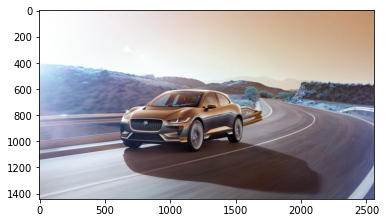

In [6]:
"Plot image using plt"
plt.imshow(image)

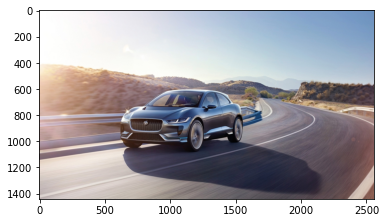

In [8]:
"CV takes images in BGR, convert them to RGB"
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

(1440, 2560) (1440, 2560) (1440, 2560)


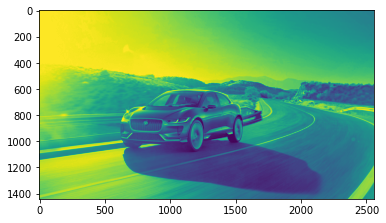

In [12]:
"Used to split image into 3 seperate channels"
r,g,b = cv2.split(new_image)
print(r.shape, g.shape, b.shape)
plt.imshow(r)
new_image = cv2.merge((r,g,b))

In [14]:
"resize the image"
s = 10
w = int(new_image.shape[1]*s/100)
h = int(new_image.shape[0]*s/100)
dims = (w,h)
re_size = cv2.resize(new_image, dims, interpolation = cv2.INTER_AREA)
re_size.shape


(144, 256, 3)

In [15]:
"rotate the image"
(h,w) = new_image.shape[:2]
c = (w/2, h/2)
angle = 90
m = cv2.getRotationMatrix2D(c, angle, 1.0)
rotate_90 = cv2.warpAffine(new_image, m, (h,w))

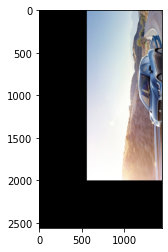

In [16]:
plt.imshow(rotate_90)

In [47]:
"upload You Only Look Once"
yolo = cv2.dnn.readNet("./yolov3-tiny.weights", "./yolov3-tiny.cfg")

In [48]:
"Read classes from coco.names"
classes = []
with open('./coco.names', 'r') as f:
  classes = f.read().splitlines()

In [49]:
"Convert image to 4 dimensional blob"
blob = cv2.dnn.blobFromImage(image, 1/255, (320,320), (0,0,0), swapRB = True, crop = False)
blob.shape

(1, 3, 320, 320)

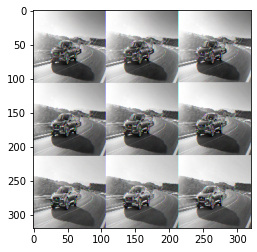

In [50]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [51]:
yolo.setInput(blob)

In [52]:
output_layer_names = yolo.getUnconnectedOutLayersNames()
layerOutput = yolo.forward(output_layer_names)

In [55]:
image.shape

(1440, 2560, 3)

In [56]:
boxes = []
confidences = []
class_ids = []
for output in layerOutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      centre_x = int(detection[0]*1440)
      centre_y = int(detection[0]*2560)
      w = int(detection[0]*1440)
      h = int(detection[0]*2560)

      x = int(centre_x - w/2)
      y = int(centre_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [57]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

In [60]:
if len(indexes) > 0:

  for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i],2))
    color = colors[i]

    cv2.rectangle(image, (x,y), (x+w, y+h), color, 2)
    cv2.putText(image, label+" "+confi, (x, y+20), font, 2, (255,255,255), 2)


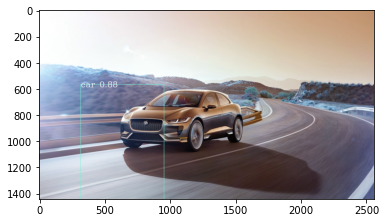

In [61]:
plt.imshow(image)